In [1]:
# !pip install --upgrade scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
#Loading data into variable using Pandas
data_df = pd.read_csv('../Data/Quotation_Rating_Prediction.csv')

In [4]:
#First Look at Dataset
data_df

,Customer Name,Quotation,Order,Diamond,Gold,Pricing,LabourCharge,OrderRating,PriceRating,DiamondRating,GoldRating,labourRating
0,7,12,6,485.960,257.470,2460.00,780.00,5.0,1,3,1,1
1,36,7,1,175.320,216.940,14149.75,0.00,1.4,1,1,1,0
2,ORAILDESIGNS,142,139,52.405,451.939,964947.57,9620.00,9.8,10,1,2,5
3,VISHALJI,1,0,0.000,5.000,0.00,0.00,0.0,0,0,1,0
4,khushik,31,17,527.020,653.830,41537.00,41517.00,5.5,3,3,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...
82,SV,11,11,22.440,109.912,10991.20,10991.20,10.0,1,1,1,6
83,Raja,18,18,22.212,127.840,323847.12,0.00,10.0,10,1,1,0
84,jenny2,3,1,11.100,16.799,21516.27,53.69,3.3,2,1,1,1
85,Lucifer,15,9,385.759,105.500,497.50,477.50,6.0,1,2,1,1


In [5]:
#All Features
list(data_df.columns)

['Customer Name',
 'Quotation',
 'Order',
 'Diamond',
 'Gold',
 'Pricing',
 'LabourCharge',
 'OrderRating',
 'PriceRating',
 'DiamondRating',
 'GoldRating',
 'labourRating']

In [6]:
#Making Target Attribute
var = 0.34*data_df['labourRating'] + 0.33*data_df['GoldRating'] + 0.33*data_df['DiamondRating'] + 1*data_df['PriceRating'] + 1*data_df['OrderRating']
data_df['Rating'] = var/3
data_df['Rating'].head()

0    2.553333
1    1.020000
2    7.496667
3    0.110000
4    4.516667
Name: Rating, dtype: float64

In [7]:
#checking for null values in whole dataset
data_df.isnull().sum()

#there is no null values found in this dataset
#uncomment respectively if you add an extra to check the validity of project

#data_df.fillna(method ='pad') 
#data_df.fillna(method ='bfill')
#data_df.interpolate(method ='linear', limit_direction ='forward')
#data_df.dropna(axis = 0, how ='any')

#data_df.isnull()


Customer Name    0
Quotation        0
Order            0
Diamond          0
Gold             0
Pricing          0
LabourCharge     0
OrderRating      0
PriceRating      0
DiamondRating    0
GoldRating       0
labourRating     0
Rating           0
dtype: int64

<Axes: >

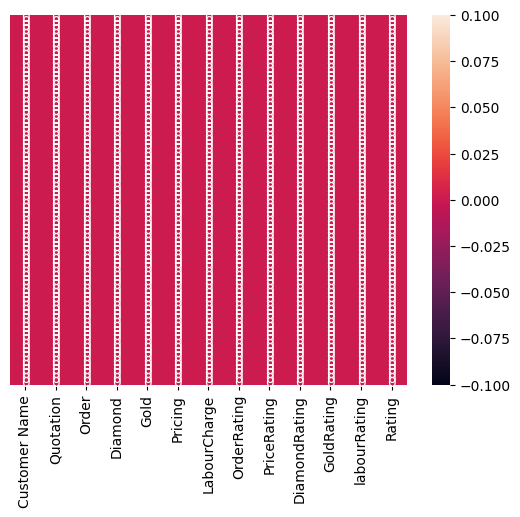

In [8]:
#heatmap of data proving there is no null values
sns.heatmap(data_df.isnull(),yticklabels=False, annot=True)

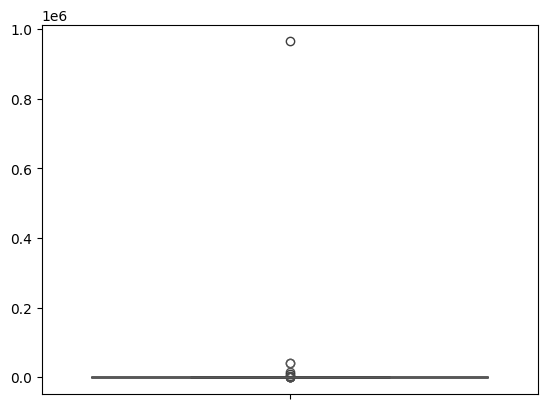

In [9]:
#Outlier detection
temp = data_df.drop(['Customer Name'],axis = 1)

#Our data's main label is country rather than the year. So we need to detect outlier row wise instead of column wise
for ind,row in temp.head().iterrows():
  sns.boxplot(row.tolist())

#NOTE: If you get the futureWarning error it is because there is no label given. However as we can see in the graph there is no outlier

In [10]:
#Preparing the data to get splitted
x = data_df.drop(['Rating', 'labourRating', 'GoldRating', 'DiamondRating', 'PriceRating', 'OrderRating'], axis = 1)
y = data_df['Rating']
xx = x.drop(['Customer Name'], axis = 1)

#splitting into train and test
#best output was obtained for 30-70 split with no randomization 
from sklearn.model_selection import train_test_split
x_train_temp, x_test_temp, y_train_temp, y_test_temp = train_test_split(x,y,test_size = 0.3, random_state = 1)

#saving country names in different variables
test_customers = x_test_temp['Customer Name']
train_customers = x_train_temp['Customer Name']
name = data_df['Customer Name']


#Preparing the Splitted data to load in Model
x_train = x_train_temp.drop(['Customer Name'], axis = 1)
y_train = y_train_temp
x_test = x_test_temp.drop(['Customer Name'], axis = 1)
y_test = y_test_temp



# SVR

In [11]:
#run SVR
from sklearn.svm import SVR

ModelSVR = SVR(kernel = 'rbf')
ModelSVR.fit(x_train, y_train)

SVR()

In [12]:
#Storing the prediction in variable

y_predSVR = ModelSVR.predict(x_test)
y_predSVR

array([3.31712777, 3.21824134, 5.25131625, 3.58592355, 3.17697816,
       3.2223745 , 3.18129421, 5.09551908, 3.17721871, 4.68330756,
       3.1769066 , 5.00684501, 3.20520079, 3.17693886, 3.18771363,
       3.17690674, 6.47728325, 3.17691387, 3.19336099, 3.47757953,
       3.26802187, 3.17690665, 3.24434723, 3.3069494 , 3.17690675,
       3.18628389, 3.1769069 ])

Text(0.5, 1.0, 'Actual Rating vs. Predicted Rating')

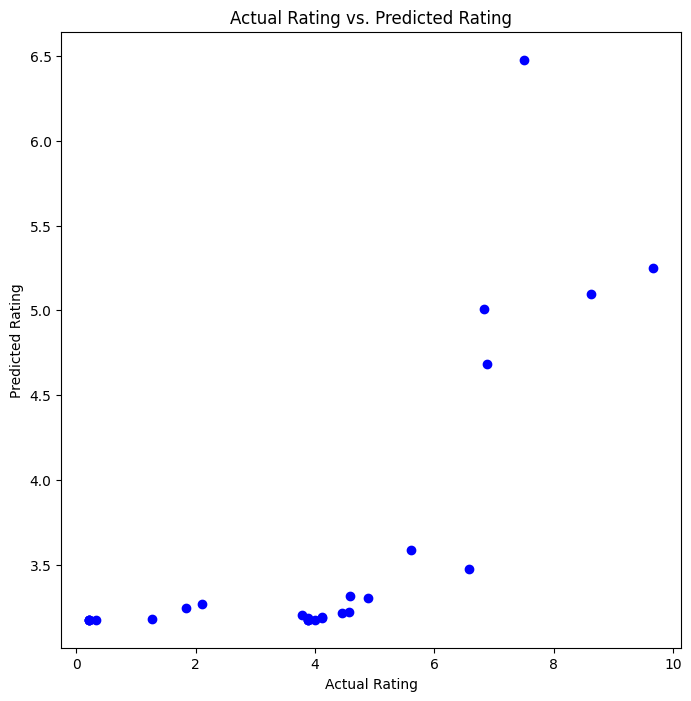

In [13]:
#plotting Scatter graph for Actual vs Predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predSVR, color = 'blue')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual Rating vs. Predicted Rating')

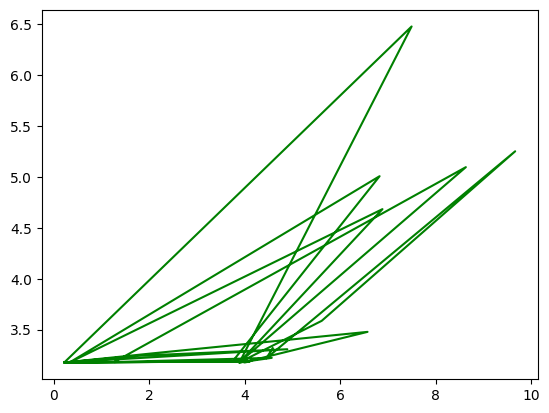

In [14]:
#plotting continous graph for Actual vs Predicted
plt.plot(y_test,y_predSVR ,'g-')

In [17]:
#Tabular form of Prediction vs Actual and difference in their values
pred_y_df_SVR = pd.DataFrame({'Customer Name':test_customers,'Actual Value':y_test,'predicted value':y_predSVR, 'Difference': y_test-y_predSVR})

#Saving the comparision table in drive
#You can donwload it from Home Page of Files
pred_y_df_SVR.to_csv('../Output/QRP_Comparision_Table_SVR.csv')
pred_y_df_SVR.head()

,Customer Name,Actual Value,predicted value,Difference
38,AJ,4.586667,3.317128,1.269539
44,V123,4.453333,3.218241,1.235092
27,Guddu,9.666667,5.251316,4.415350
40,sk9,5.613333,3.585924,2.027410
36,arihaa,3.886667,3.176978,0.709689


In [31]:
#Calculating Accuracy and RMS Error
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy: ",r2_score(y_test,y_predSVR))
print("Mean Sqaure Root Error: ",np.sqrt(mean_squared_error(y_test, y_predSVR)))

Accuracy:  0.34732303739073356
Mean Sqaure Root Error:  2.0834189774897145


# LR

In [18]:
#importing LinearRegression Algorithm
from sklearn.linear_model import LinearRegression

#Running the model on our splitted data
ModelLR = LinearRegression()
ModelLR.fit(x_train,y_train)

LinearRegression()

In [19]:
#Storing the prediction in variable
y_predLR = ModelLR.predict(x_test)
y_predLR

array([ 3.09605652,  2.91720198,  2.28543542,  3.12505916,  2.44473301,
        2.68230481,  2.10702641,  3.91537937,  2.57719995,  4.00150291,
        2.75838214,  3.16574088,  2.6087109 ,  2.22093687,  3.5222033 ,
        2.53725421, -0.66051283,  2.5629014 ,  2.57812965,  3.28560239,
        2.75952192,  2.78862154,  2.73338652,  4.37454038,  2.61633095,
        2.54987612,  2.40937573])

Text(0.5, 1.0, 'Actual Rating vs. Predicted Rating')

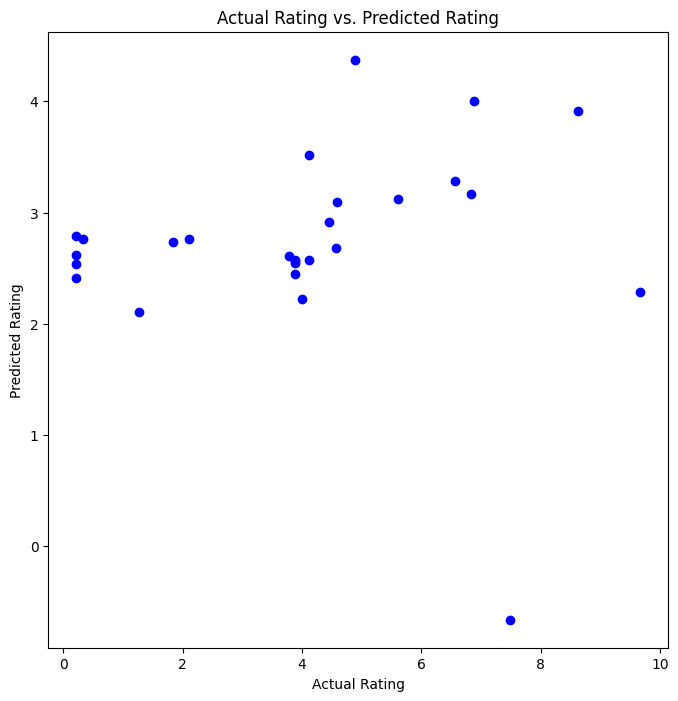

In [20]:
#plotting Scatter graph for Actual vs Predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predLR, color = 'blue')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual Rating vs. Predicted Rating')

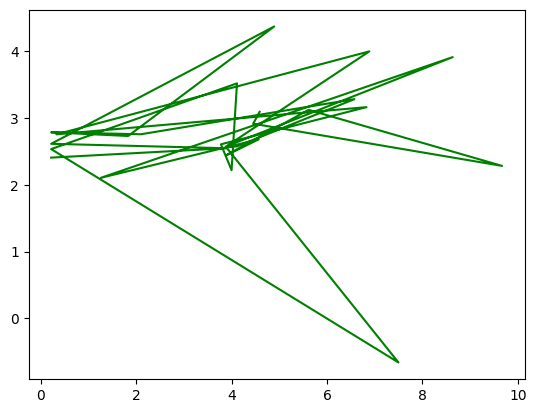

In [21]:
#plotting continous graph for Actual vs Predicted
plt.plot(y_test,y_predLR ,'g-')

In [22]:
#Tabular form of Prediction vs Actual and difference in their values
pred_y_df_LR = pd.DataFrame({'Customer Name':test_customers,'Actual Value':y_test,'predicted value':y_predLR, 'Difference': y_test-y_predLR})

#Saving the comparision table in drive
#You can donwload it from Home Page of Files
pred_y_df_LR.to_csv('../Output/QRP_Comparision_Table_LR.csv')
pred_y_df_LR.head()

,Customer Name,Actual Value,predicted value,Difference
38,AJ,4.586667,3.096057,1.490610
44,V123,4.453333,2.917202,1.536131
27,Guddu,9.666667,2.285435,7.381231
40,sk9,5.613333,3.125059,2.488274
36,arihaa,3.886667,2.444733,1.441934


In [23]:
#Calculating Accuracy and RMS Error
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy: ",r2_score(y_test,y_predLR))
print("Mean Sqaure Root Error: ",np.sqrt(mean_squared_error(y_test, y_predLR)))

Accuracy:  -0.310647348388146
Mean Sqaure Root Error:  2.9523673949903677


# PR

In [24]:
#importing LinearRegression Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
x_train_poly = poly.fit_transform(x_train)
poly.fit(x_train_poly, y_train)
ModelPR = LinearRegression()
ModelPR.fit(x_train_poly, y_train)

LinearRegression()

In [25]:
#Storing the prediction in variable
x_test_poly = poly.fit_transform(x_test)
y_predPR = ModelPR.predict(x_test_poly)
y_predPR

array([ 5.28595793e+00,  1.98977745e+00,  2.58038225e+08,  1.22715917e+02,
        1.91247040e+00,  2.66718132e+00,  1.91432306e+00,  1.85624141e+07,
        1.91247064e+00, -5.83779794e+03,  1.91247192e+00,  8.70538621e+05,
        1.94808017e+00,  1.91247041e+00,  1.88479203e+00,  1.91247041e+00,
        3.95797749e+05,  1.91247041e+00,  1.92805362e+00,  8.45877033e+02,
        3.54372175e+00,  1.91247112e+00,  2.44176502e+00, -7.56105609e+02,
        1.91247041e+00,  1.91421833e+00,  1.91247041e+00])

Text(0.5, 1.0, 'Actual Rating vs. Predicted Rating')

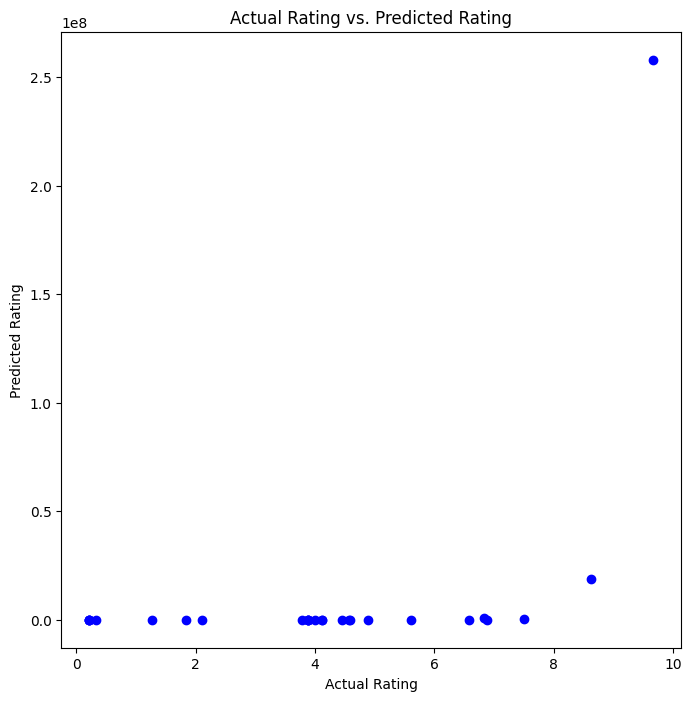

In [26]:
#plotting Scatter graph for Actual vs Predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predPR, color = 'blue')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual Rating vs. Predicted Rating')

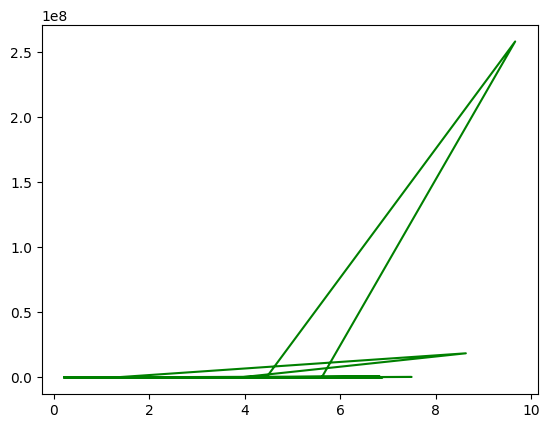

In [27]:
#plotting continous graph for Actual vs Predicted
plt.plot(y_test,y_predPR ,'g-')

In [28]:
#Tabular form of Prediction vs Actual and difference in their values
pred_y_df_PR = pd.DataFrame({'Customer Name':test_customers,'Actual Value':y_test,'predicted value':y_predPR, 'Difference': y_test-y_predPR})

#Saving the comparision table in drive
#You can donwload it from Home Page of Files
pred_y_df_PR.to_csv('../Output/QRP_Comparision_Table_PR.csv')
pred_y_df_PR.head()

,Customer Name,Actual Value,predicted value,Difference
38,AJ,4.586667,5.285958e+00,-6.992913e-01
44,V123,4.453333,1.989777e+00,2.463556e+00
27,Guddu,9.666667,2.580382e+08,-2.580382e+08
40,sk9,5.613333,1.227159e+02,-1.171026e+02
36,arihaa,3.886667,1.912470e+00,1.974196e+00


In [29]:
#Calculating Accuracy and RMS Error
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy: ",r2_score(y_test,y_predPR))
print("Mean Sqaure Root Error: ",np.sqrt(mean_squared_error(y_test, y_predPR)))

Accuracy:  -372732197276078.6
Mean Sqaure Root Error:  49788143.04325234


# Decision Tree Regressor

In [30]:
#trying decision tree on whole dataset
from sklearn.tree import DecisionTreeRegressor

ModelDT = DecisionTreeRegressor(random_state = 0)
ModelDT.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [32]:
#Storing the prediction in variable
y_predDT = ModelDT.predict(x_test)
y_predDT

array([4.56666667, 4.45333333, 9.6       , 6.68666667, 3.88666667,
       4.45333333, 1.02      , 8.13      , 3.88666667, 6.88666667,
       0.22      , 7.18666667, 3.77666667, 3.88666667, 1.02      ,
       0.22      , 7.06      , 0.11      , 4.11333333, 5.66666667,
       4.33333333, 0.22      , 3.        , 2.92666667, 0.22      ,
       3.88666667, 0.22      ])

Text(0.5, 1.0, 'Actual Rating vs. Predicted Rating')

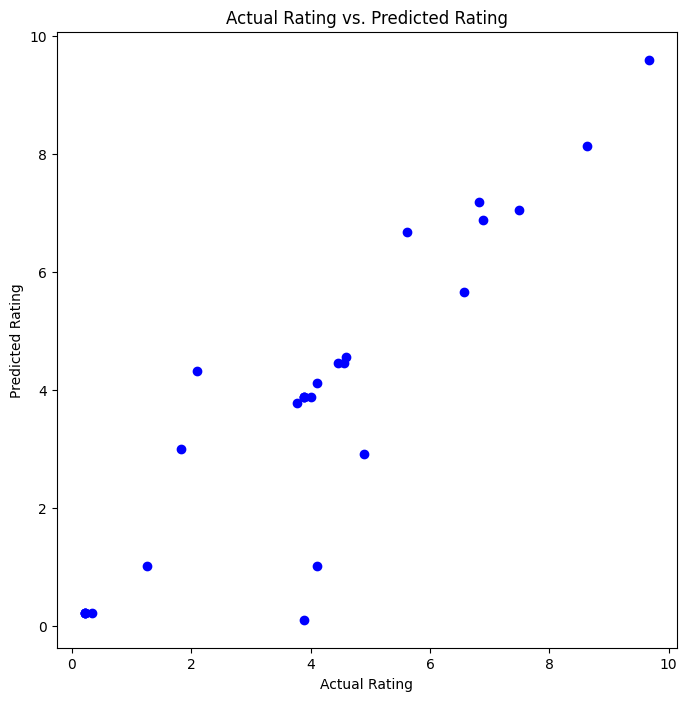

In [33]:
#plotting Scatter graph for Actual vs Predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predDT, color = 'blue')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual Rating vs. Predicted Rating')

In [44]:
#Tabular form of Prediction vs Actual and difference in their values
pred_y_df_DT = pd.DataFrame({'Customer Name':test_customers,'Actual Value':y_test,'predicted value':y_predDT, 'Difference': y_test-y_predDT})

#Saving the comparision table in drive
#You can donwload it from Home Page of Files
pred_y_df_DT.to_csv('../Output/QRP_Comparision_Table_DT.csv')
pred_y_df_DT.head()

,Customer Name,Actual Value,predicted value,Difference
38,AJ,4.586667,4.566667,0.020000
44,V123,4.453333,4.453333,0.000000
27,Guddu,9.666667,9.600000,0.066667
40,sk9,5.613333,6.686667,-1.073333
36,arihaa,3.886667,3.886667,0.000000


In [45]:
#Calculating Accuracy and RMS Error
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy: ",r2_score(y_test,y_predDT))
print("Mean Sqaure Root Error: ",np.sqrt(mean_squared_error(y_test, y_predDT)))

Accuracy:  0.795485839965177
Mean Sqaure Root Error:  1.1662433094299505


# Random Forest

In [46]:
#trying random forest on whole dataset
from sklearn.ensemble import RandomForestRegressor

ModelRF = RandomForestRegressor(n_estimators = 10, random_state = 0)
ModelRF.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [47]:
#Storing the prediction in variable
y_predRF = ModelRF.predict(x_test)
y_predRF

array([3.73733333, 4.17733333, 8.757     , 6.04      , 3.02666667,
       3.97833333, 2.493     , 8.083     , 3.92033333, 6.93366667,
       0.22      , 7.207     , 3.766     , 2.89333333, 2.508     ,
       0.176     , 7.10566667, 0.383     , 4.102     , 5.86333333,
       3.38066667, 0.22      , 2.47533333, 3.08166667, 0.22      ,
       3.743     , 0.22      ])

Text(0.5, 1.0, 'Actual Rating vs. Predicted Rating')

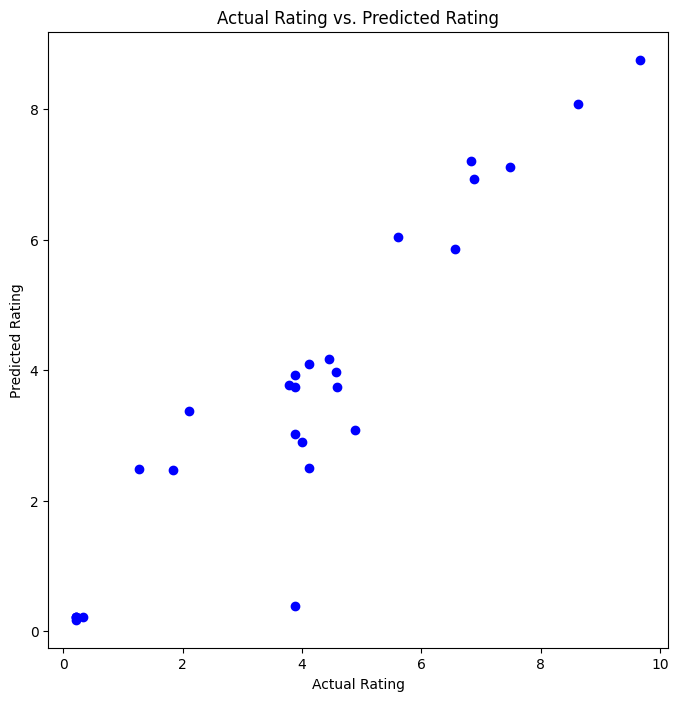

In [48]:
#plotting Scatter graph for Actual vs Predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predRF, color = 'blue')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual Rating vs. Predicted Rating')

In [49]:
#Tabular form of Prediction vs Actual and difference in their values
pred_y_df_RF = pd.DataFrame({'Customer Name':test_customers,'Actual Value':y_test,'predicted value':y_predRF, 'Difference': y_test-y_predRF})

#Saving the comparision table in drive
#You can donwload it from Home Page of Files
pred_y_df_RF.to_csv('../Output/QRP_Comparision_Table_RF.csv')
pred_y_df_RF.head()

,Customer Name,Actual Value,predicted value,Difference
38,AJ,4.586667,3.737333,0.849333
44,V123,4.453333,4.177333,0.276000
27,Guddu,9.666667,8.757000,0.909667
40,sk9,5.613333,6.040000,-0.426667
36,arihaa,3.886667,3.026667,0.860000


In [50]:
#Calculating Accuracy and RMS Error
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy: ",r2_score(y_test,y_predRF))
print("Mean Sqaure Root Error: ",np.sqrt(mean_squared_error(y_test, y_predRF)))

Accuracy:  0.8497307009182964
Mean Sqaure Root Error:  0.9996836845401662
